# CS Project


In [4]:
!pip install plotly==5.1.0
!pip install -U kaleido
!pip install nbformat
!pip install --upgrade nbformat

In [5]:
import plotly as py
import pandas as pd
import plotly.express as px
import json
import numpy
import kaleido
import os
import glob
import matplotlib.pyplot as plt


In [21]:
INDIA_STATE_GEOMETRY_PATH = "Mapfile\states_india.geojson"
INDIA_STATE_KEYS_PATH = "Mapfile\mapping_key.csv"
DISEASE_RISK_PATH = "risk_csv"
DISEASE_PATH = 'disease_csv'
MAP_PATH = 'maps'

In [8]:
def mapping_key_generator():
    df = pd.read_csv("Diseases\AH.csv") #

    india_states = json.load(open('Mapfile\states_india.geojson', 'r'))

    cid = pd.DataFrame(df[['state_mapper','Location']])

    cid.to_csv('Mapfile\mapping_key.csv')

In [9]:
def utility2(india_states):
  state_id_map = {}
  for feature in india_states['features']:
    feature['id'] = feature['properties']['state_code']
    state_id_map[feature['properties']['st_nm']] = feature['id']
  return india_states

In [10]:
def map_key_adder(csv_to_concat,csv_to_concat_with): 
    #ld = pd.read_csv('Lead.csv')
    MAP_PRINT = pd.merge(csv_to_concat_with,csv_to_concat)
    return MAP_PRINT

In [11]:
def variance_col_adder(a,df_name):
    a = pd.read_csv("Child Underweight.csv")
    variance = a.var()['Value']
    Variance = a['Value'] - a['Value']*variance
    a['Variance'] = Variance
    a.to_csv(file=os.path.join('norm_risk',f'{df_name}.csv'))
    return a
    
    

#PLOT MAP


In [ ]:
def map_plot(map_csv,geo_json, map_write_path,names):
    map_csv['id'] = map_csv['state_mapper']
    fig = px.choropleth(map_csv, locations ='id', geojson = geo_json, color = 'Value')
    fig.update_geos(fitbounds = 'locations', visible= False)
    fig.update_layout(
    title_text = names
     # limite map scope to USA
)
    # fig.show()
    fig.write_image(file=os.path.join('maps',f'{names}.png'), format='png')

In [15]:
def get_all_csv(specific_path):
    path = os.getcwd()
    csv_files = glob.glob(os.path.join(path,specific_path,"*.csv"))
    return csv_files

In [ ]:
CSV_FILES = get_all_csv(DISEASE_RISK_PATH)
cid = pd.read_csv(INDIA_STATE_KEYS_PATH)

india_states = json.load(open('Mapfile\states_india.geojson', 'r'))
india_states = utility2(india_states)
for f in CSV_FILES:
    print(f)
    df = pd.read_csv(f)
    map_print = map_key_adder(df,cid)
    splitf = f.split('\\')
    print(splitf[-1].split('.')[0])
    map_plot(map_print,india_states , MAP_PATH,splitf[-1].split('.')[0])
    

#PLOT LINE

C:\Users\saama\AppData\Local\Temp\ipykernel_19736\2048297033.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['variance']=(df['Value']-df.mean()['Value'])/df.std()['Value']
C:\Users\saama\AppData\Local\Temp\ipykernel_19736\2048297033.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['variance']=(df['Value']-df.mean()['Value'])/df.std()['Value']
C:\Users\saama\AppData\Local\Temp\ipykernel_19736\2048297033.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['variance']=(

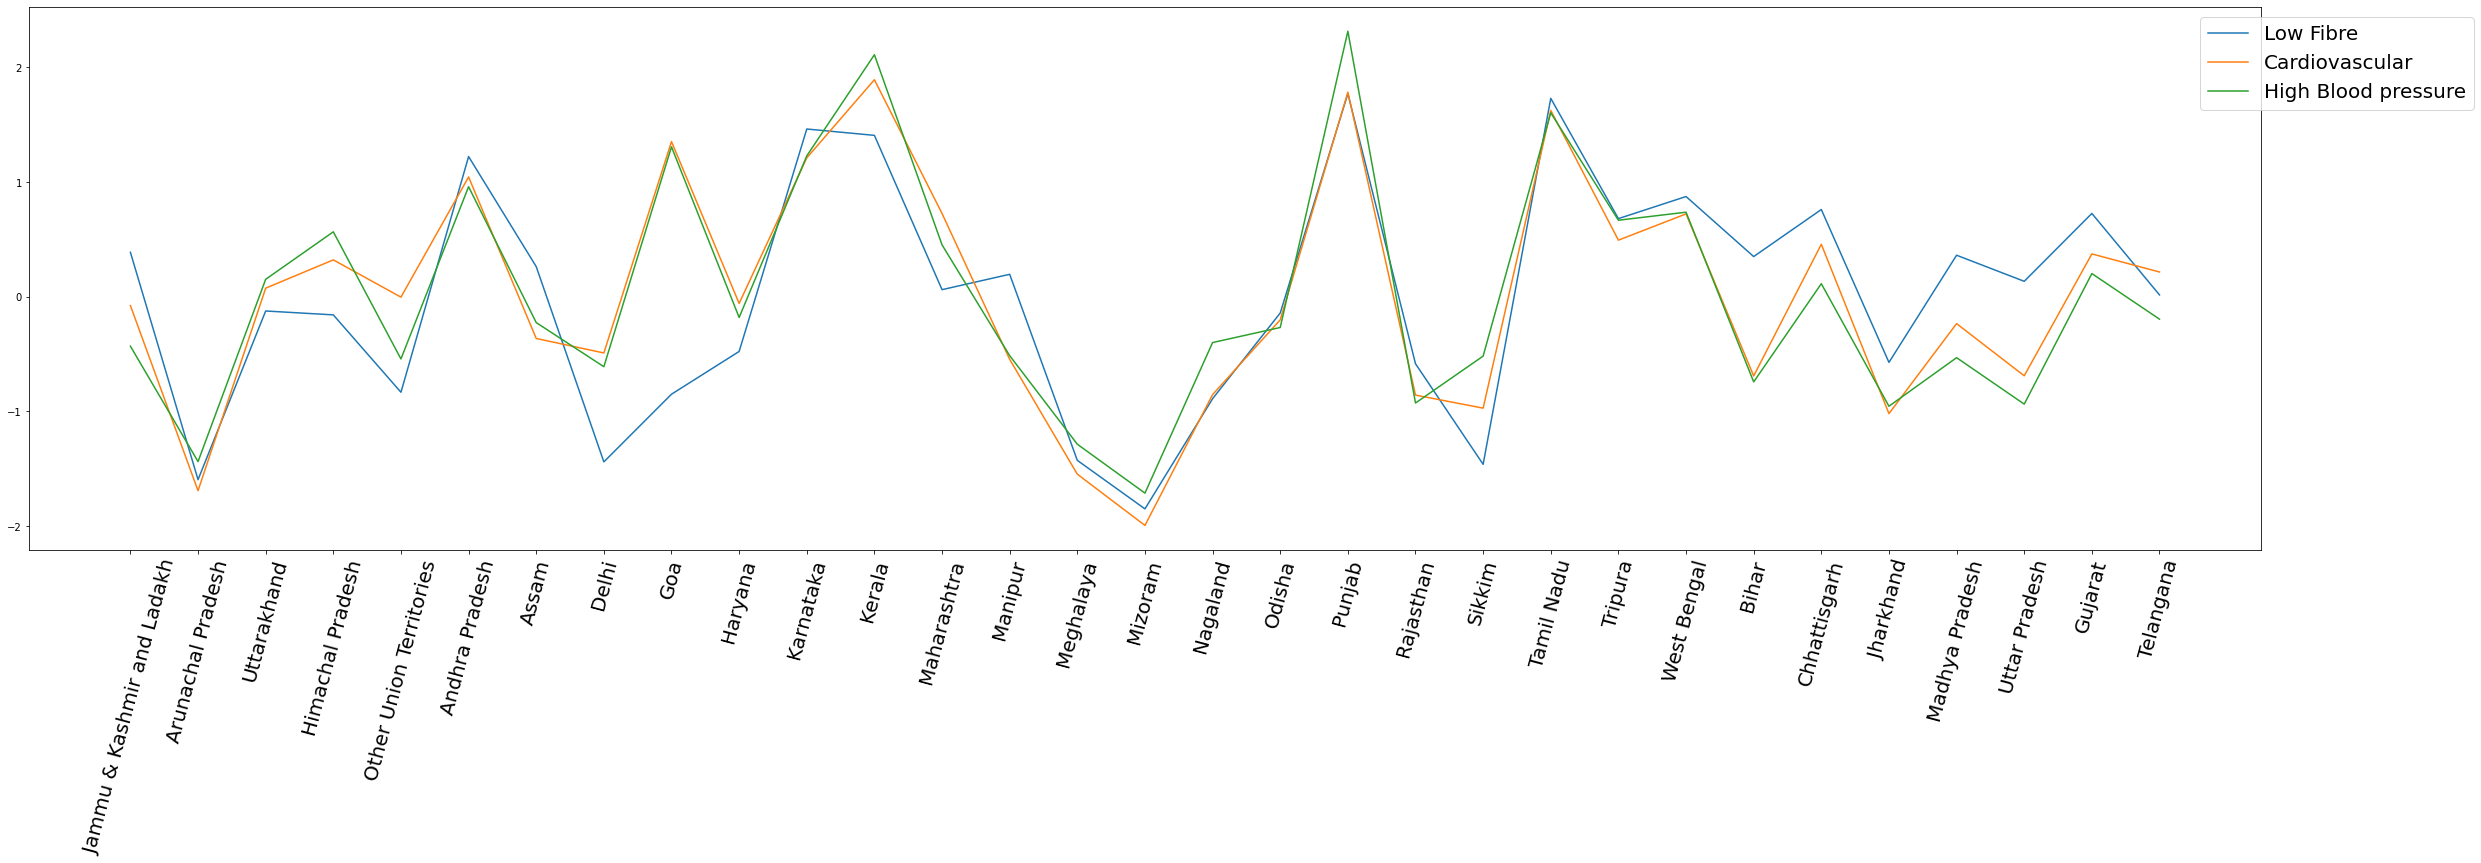

In [50]:
CSV_FILES = get_all_csv("testLine")
csv_file = []
for f in CSV_FILES:
    csv_file.append(f)
#print(csv_file)
f = plt.figure()
#plt.autoscale()
for i in range(len(csv_file)):
    x = pd.read_csv(csv_file[i-1])
    df = pd.DataFrame(x)
    #print(df)
    df['Value'].dropna()
    #print(df)
    df['variance']=(df['Value']-df.mean()['Value'])/df.std()['Value']
    #variance = df.var()['Value']
    #Variance = df['Value'] - variance 
    '''df['Value']*'''
    #df['variance'] = Variance
    splitf = csv_file[i-1].split(os.path.sep)
    
    #plt.legend(splitf[-1].split('.')[0])
    plt.plot(df['Location'].tolist(), df['variance'].tolist(), label = splitf[-1].split('.')[0])
    #art.Artist.set_label(csv_file)
    
    f.set_figwidth(40)
    f.set_figheight(10)
plt.xticks(rotation = 75, fontsize = 20)
plt.legend(loc='best', bbox_to_anchor=(.1, 0, 1, 1),fontsize = 20)


2nd Iteration


In [32]:
CSV_FILES = get_all_csv("disease_csv")
csv_file = []
for f in CSV_FILES:
    csv_file.append(f)
#print(csv_file)
f = plt.figure()
df_pop = pd.read_csv('populationperstate.csv')
#plt.autoscale()
for i in range(len(csv_file)):
    x = pd.read_csv(csv_file[i-1])
    df = pd.DataFrame(x)
    #print(df)
    df['Value'].dropna()
    dfinal = df.merge(df_pop, on="Location", how = 'inner')
    splitf = csv_file[i-1].split(os.path.sep)
    dfinal["pct"] = dfinal["Value"]/ dfinal['Total Population'] *100
    
    #plt.legend(splitf[-1].split('.')[0])
    #plt.plot(df['Location'].tolist(), df['[pct]'].tolist(), label = splitf[-1].split('.')[0])
    #art.Artist.set_label(csv_file)
    print(dfinal.head())
    #f.set_figwidth(40)
    #f.set_figheight(10)
#plt.xticks(rotation = 75, fontsize = 20)
#plt.legend(loc='best', bbox_to_anchor=(.1, 0, 1, 1),fontsize = 20)


                     Location  Year       Age   Sex Cause of death or injury  \
0  Jammu & Kashmir and Ladakh  2019  All ages  Both             Tuberculosis   
1           Arunachal Pradesh  2019  All ages  Both             Tuberculosis   
2                 Uttarakhand  2019  All ages  Both             Tuberculosis   
3            Himachal Pradesh  2019  All ages  Both             Tuberculosis   
4     Other Union Territories  2019  All ages  Both             Tuberculosis   

              Measure      Value  Lower bound  Upper bound  Total Population  \
0  Deaths per 100,000  15.338328    12.644056    19.359440          13895343   
1  Deaths per 100,000  22.821366    17.672766    28.765897           1570458   
2  Deaths per 100,000  41.442732    33.186365    51.564207          11250858   
3  Deaths per 100,000  25.979198    20.367196    32.404502           7451955   
4  Deaths per 100,000  20.922883    15.755898    28.111645           3677958   

        pct  
0  0.000110  
1  0.00145

<Figure size 432x288 with 0 Axes>

Deaths vs disease

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

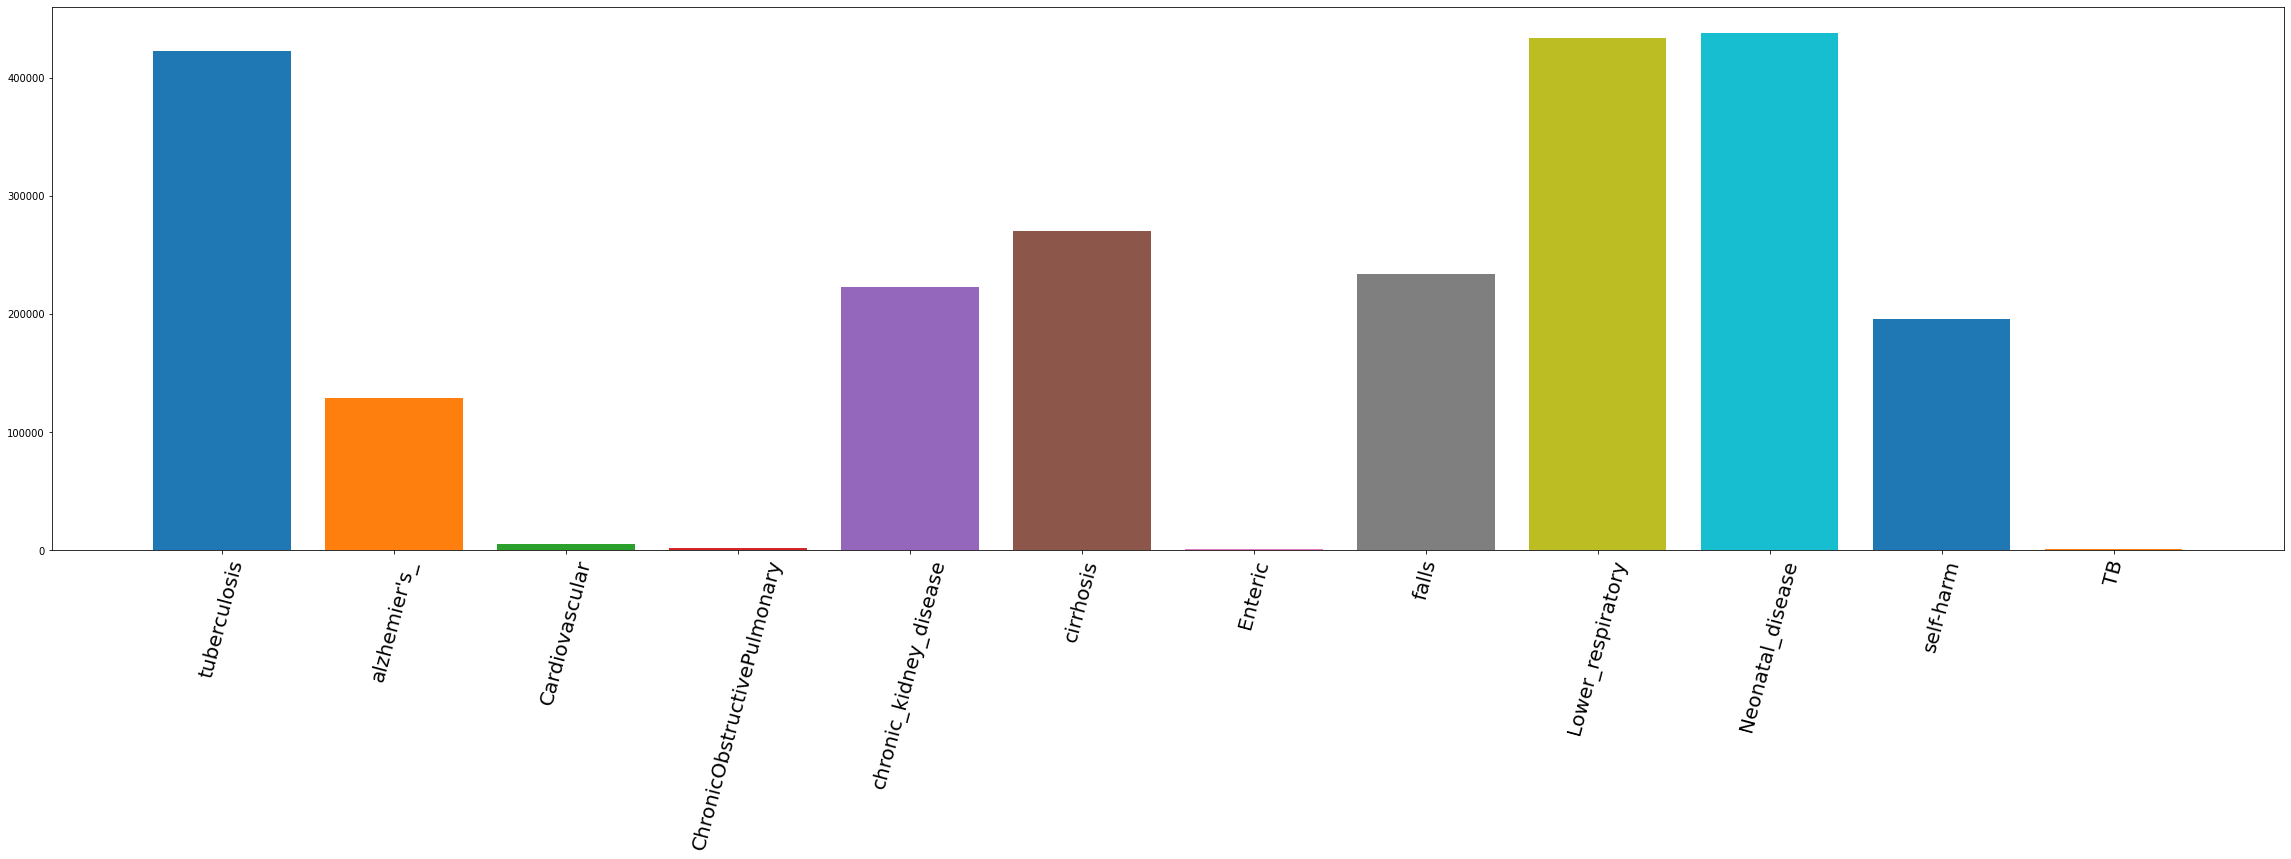

In [45]:
CSV_FILES = get_all_csv("disease_csv")
csv_file = []
for f in CSV_FILES:
    csv_file.append(f)
#print(csv_file)
f = plt.figure()
df_pop = pd.read_csv('populationperstate.csv')
#plt.autoscale()
for i in range(len(csv_file)):
    x = pd.read_csv(csv_file[i-1])
    df = pd.DataFrame(x)
    
    #print(df)
    #df['Value'].dropna()
    #dfinal = df.merge(df_pop, on="Location", how = 'inner')
    splitf = csv_file[i-1].split(os.path.sep)
    #dfinal["pct"] = dfinal["Value"]/ dfinal['Total Population'] *100
    
    #plt.legend(splitf[-1].split('.')[0])
    plt.bar(splitf[-1].split('.')[0], df["Value"].sum(axis=0))
    #art.Artist.set_label(csv_file)
    #print(dfinal.head())
    f.set_figwidth(40)
    f.set_figheight(10)
plt.xticks(rotation = 75, fontsize = 20)
#plt.legend(loc='best', bbox_to_anchor=(.1, 0, 1, 1),fontsize = 20)

1. Plot bar graph of top death causing factor in each state
2. same as above for Diseases
3. Which disease varies most across state
4. which risk varies most across state